In [10]:
import os

# Set the path to your dataset
data_dir = "/plant_proj/input/"

# List all subdirectories (class folders)
class_names = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Sort the class names (optional, for consistency)
class_names.sort()

# Print all class names
print(f"Total classes: {len(class_names)}")
for i, name in enumerate(class_names, 1):
    print(f"{i}. {name}")


Total classes: 39
1. Apple___Apple_scab
2. Apple___Black_rot
3. Apple___Cedar_apple_rust
4. Apple___healthy
5. Background_without_leaves
6. Blueberry___healthy
7. Cherry___Powdery_mildew
8. Cherry___healthy
9. Corn___Cercospora_leaf_spot Gray_leaf_spot
10. Corn___Common_rust
11. Corn___Northern_Leaf_Blight
12. Corn___healthy
13. Grape___Black_rot
14. Grape___Esca_(Black_Measles)
15. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
16. Grape___healthy
17. Orange___Haunglongbing_(Citrus_greening)
18. Peach___Bacterial_spot
19. Peach___healthy
20. Pepper,_bell___Bacterial_spot
21. Pepper,_bell___healthy
22. Potato___Early_blight
23. Potato___Late_blight
24. Potato___healthy
25. Raspberry___healthy
26. Soybean___healthy
27. Squash___Powdery_mildew
28. Strawberry___Leaf_scorch
29. Strawberry___healthy
30. Tomato___Bacterial_spot
31. Tomato___Early_blight
32. Tomato___Late_blight
33. Tomato___Leaf_Mold
34. Tomato___Septoria_leaf_spot
35. Tomato___Spider_mites Two-spotted_spider_mite
36. Tomato___T

In [13]:
if ".ipynb_checkpoints" in class_names:
    class_names.remove(".ipynb_checkpoints")

In [15]:
from PIL import Image
import os

data_dir = "/plant_proj/input_data/"

image_stats = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    images = [img for img in images if img.endswith(('.jpg', '.JPG','.jpeg', '.png'))]

    sizes = []
    for img_name in images[:5]:  # check only first 5 images for size
        img_path = os.path.join(class_path, img_name)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")
    
    image_stats[class_name] = {
        "num_images": len(images),
        "sample_sizes": sizes
    }

# Print summary
for cls, stats in image_stats.items():
    print(f"{cls} → {stats['num_images']} images | Sample sizes: {stats['sample_sizes']}")


Apple___Apple_scab → 630 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Apple___Black_rot → 621 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Apple___Cedar_apple_rust → 275 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Apple___healthy → 1645 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Background_without_leaves → 1143 images | Sample sizes: [(256, 192), (256, 192), (256, 192), (256, 192), (256, 192)]
Blueberry___healthy → 1502 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Cherry___Powdery_mildew → 1052 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Cherry___healthy → 854 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Corn___Cercospora_leaf_spot Gray_leaf_spot → 513 images | Sample sizes: [(256, 256), (256, 256), (256, 256), (2

In [17]:
import os

base_path = '/plant_proj/input_data'

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.jpeg', '.png', '.jpg')):
                name_wo_ext = os.path.splitext(filename)[0]
                new_filename = name_wo_ext + '.jpg'

                old_path = os.path.join(folder_path, filename)
                new_path = os.path.join(folder_path, new_filename)

                counter = 1
                # 🔁 Keep trying until name is unique
                while os.path.exists(new_path):
                    new_filename = f"{name_wo_ext}_{counter}.jpg"
                    new_path = os.path.join(folder_path, new_filename)
                    counter += 1

                os.rename(old_path, new_path)

print("✅ All images renamed safely to .jpg with unique names")


✅ All images renamed safely to .jpg with unique names


C:\Users\DELL\AppData\Local\Temp\ipykernel_1216\3541685425.py:35: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
E:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


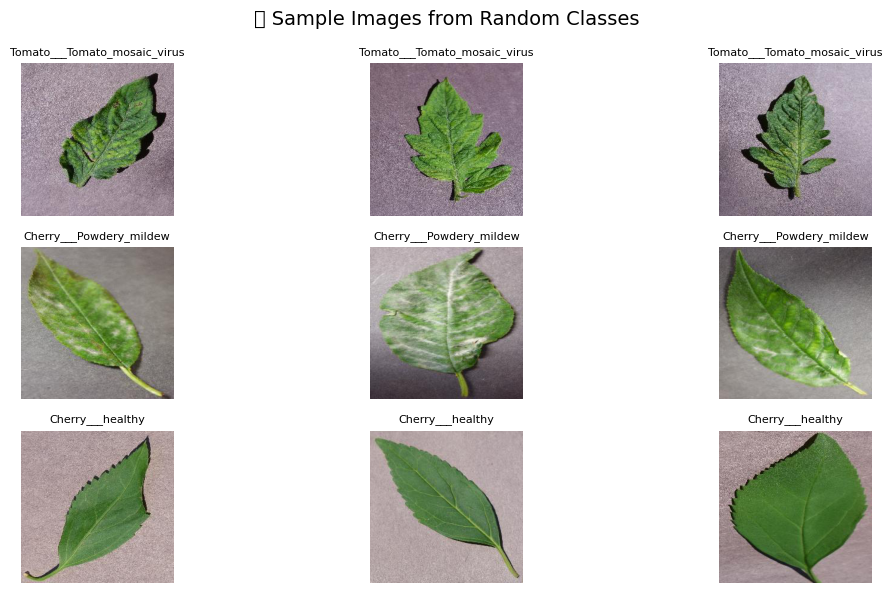

In [18]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to your dataset
base_path = '/plant_proj/input_data'

# Get all class folders (excluding hidden/system folders)
class_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f)) and not f.startswith('.')]

# Pick 3 random class folders
selected_classes = random.sample(class_folders, 3)

plt.figure(figsize=(12, 6))

# Loop through each selected class
for i, class_name in enumerate(selected_classes):
    class_path = os.path.join(base_path, class_name)
    all_images = [img for img in os.listdir(class_path) if img.lower().endswith('.jpg')]

    # Pick 3 random images from the class
    selected_images = random.sample(all_images, min(3, len(all_images)))

    for j, img_name in enumerate(selected_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)

        plt.subplot(3, 3, i*3 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name, fontsize=8)

plt.suptitle('🌿 Sample Images from Random Classes', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
tf.data.experimental.enable_debug_mode()


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
img_size = (224, 224)
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/plant_proj/input_data',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    '/plant_proj/input_data',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)



Found 44371 images belonging to 40 classes.
Found 11077 images belonging to 40 classes.


In [3]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = val_generator.samples // batch_size

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# 2) Save this “fresh” model to disk
model.save('mobilenetv2_base_model.h5')
print("✔️ Base model saved to mobilenetv2_base_model.h5")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,427,112 (9.26 MB)

 Trainable params: 169,128 (660.66 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

✔️ Base model saved to mobilenetv2_base_model.h5


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Load model without compiling
model = load_model('mobilenetv2_base_model.h5', compile=False)
print("✔️ Model loaded, compiling...")

# Compile manually
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # or 'sparse_categorical_crossentropy' based on y_batch format
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Check batch
x_batch, y_batch = next(train_generator)
print("Batch shape:", x_batch.shape, y_batch.shape)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=callbacks
)


✔️ Model loaded, compiling...
Batch shape: (32, 224, 224, 3) (32, 40)
Epoch 1/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4080 - loss: 2.3918

1386/1386 ━━━━━━━━━━━━━━━━━━━━ 2700s 2s/step - accuracy: 0.4081 - loss: 2.3913 - val_accuracy: 0.8504 - val_loss: 0.6356
Epoch 2/10
   1/1386 ━━━━━━━━━━━━━━━━━━━━ 13:20 578ms/step - accuracy: 0.6250 - loss: 0.9707

E:\anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1386/1386 ━━━━━━━━━━━━━━━━━━━━ 218s 157ms/step - accuracy: 0.6250 - loss: 0.9707 - val_accuracy: 0.8496 - val_loss: 0.6358
Epoch 3/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.7772 - loss: 0.8149

1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1593s 1s/step - accuracy: 0.7772 - loss: 0.8148 - val_accuracy: 0.9008 - val_loss: 0.3741
Epoch 4/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 212s 152ms/step - accuracy: 0.8750 - loss: 0.4346 - val_accuracy: 0.9008 - val_loss: 0.3741
Epoch 5/10
1213/1386 ━━━━━━━━━━━━━━━━━━━━ 3:42 1s/step - accuracy: 0.8323 - loss: 0.5813

KeyboardInterrupt: 

In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
tf.config.run_functions_eagerly(True)  # Ensure eager execution

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


TensorFlow version: 2.19.0


In [21]:
import sys
print(sys.executable)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

E:\anaconda\python.exe


ModuleNotFoundError: No module named 'tensorflow.keras'

In [23]:
import sys
!{sys.executable} -m pip install tensorflow --upgrade
